# Figure 3: Sensitivity test

**Revision: 27 November 2024**

**Fig. 3. Sensitivity test.** EKE trends computed over the (A) global ocean and (B) high EKE regions for different periods. Significant trends (p < 0.05) are written in bold text, while non-significant trends are written in italics. (C) Ratio of the all-sat EKE trend divided by the two-sat EKE trend.

### Import libraries

In [2]:
%reload_ext autoreload
%autoreload 2

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import utils
from matplotlib.patches import Patch

### Open files with the time series of each region

In [3]:
kinds = ['ALL_SAT', 'TWO_SAT']
timeseries = {}
for kind in kinds:
    path_ts = f'../../results/EKE_{kind}/tseries/EKE_{kind}_tseries.nc'
    timeseries[kind] = xr.open_dataset(path_ts)

## Calculate trends over different periods of the EKE time series

In [4]:
# Multply by the factor 365 days to convert trends per day to trends per year 
# units from (cm$^2$ s$^{-2}$ day$^{-1}$) to (cm$^2$ s$^{-2}$ y$^{-1}$)
factor = 365

# Regions for the test
dic_keys   = ['no ice', 'high eke']

# Years for the test
test_years = np.arange(1993, 2013+1)#)2000, 2015+1)

In [5]:
list_slope_global_all = []
list_slope_global_two = []

list_slope_highEKE_all = []
list_slope_highEKE_two = []

list_pval_global_all = []
list_pval_global_two = []

list_pval_highEKE_all = []
list_pval_highEKE_two = []

list_se_global_all = []
list_se_global_two = []

list_se_highEKE_all = []
list_se_highEKE_two = []

for year in test_years:

    # Initial date from which to calculate trends:
    cut_initial_date = str(year) + '-01-01' 
    
    print(' ')
    print(year)
    print(' ')
    
    list_slope_all = []
    list_slope_two = []
    list_pval_all  = []
    list_pval_two  = []
    list_se_all    = []
    list_se_two    = []   

    for k in range(len(dic_keys)):
            
            # --------- COMPUTE TRENDS ---------
            
            print('')
            print('----------------')
            print(dic_keys[k])
            print('----------------')
            
            # all-sat raw
            all_ts = timeseries['ALL_SAT'][dic_keys[k]].sel(time=slice(cut_initial_date, None))
            
#             print('all-sat min date...', all_ts.time.min())
#             print('all-sat max date...', all_ts.time.max())
            
            # all-sat 365 day rolling mean 
            all_ts_roll = all_ts.rolling(time=365, center=True).mean()

            # two-sat raw
            two_ts = timeseries['TWO_SAT'][dic_keys[k]].sel(time=slice(cut_initial_date, None))
            
#             print('two-sat min date...', two_ts.time.min())
#             print('two-sat max date...', two_ts.time.max())
            
            # two-sat 365 day rolling mean 
            two_ts_roll = two_ts.rolling(time=365, center=True).mean()
       
            
            # MK test
            slope_allraw,  p_value_allraw, se_allraw   = utils.mk_test(all_ts)
            slope_allroll, p_value_allroll, se_allroll = utils.mk_test(all_ts_roll)

            slope_tworaw,  p_value_tworaw, se_tworaw   = utils.mk_test(two_ts)
            slope_tworoll, p_value_tworoll, se_tworoll = utils.mk_test(two_ts_roll) 
            
            # save values for the raw time series into a list

            list_slope_all.append(slope_allraw*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)
            list_slope_two.append(slope_tworaw*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)

            list_pval_all.append(p_value_allraw) 
            list_pval_two.append(p_value_tworaw)    

            list_se_all.append(se_allraw*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)
            list_se_two.append(se_tworaw*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)         
            
#             print(' ')
#             #print('TIME SERIES FROM...', two_ts.time.min())
#             #print('TIME SERIES TO...', two_ts.time.max())
#             print('')
#             print('Yue and Wang Modified MK Test')
#             print('trends, p_value')
#             print('all-sat raw... ',  slope_allraw*factor,  p_value_allraw)
#             print('two-sat raw... ',  slope_tworaw*factor,  p_value_tworaw)
#             print('')
#             print('all-sat roll... ', slope_allroll*factor, p_value_allroll)
#             print('two-sat roll... ', slope_tworoll*factor, p_value_tworoll)            
            
    
    # Save all-sat trends
    list_slope_global_all.append(list_slope_all[0]) 
    list_slope_highEKE_all.append(list_slope_all[1])

    # Save two-sat trends
    list_slope_global_two.append(list_slope_two[0]) 
    list_slope_highEKE_two.append(list_slope_two[1])
    
    # Save all-sat significance
    list_pval_global_all.append(list_pval_all[0]) 
    list_pval_highEKE_all.append(list_pval_all[1])

    # Save two-sat significance
    list_pval_global_two.append(list_pval_two[0]) 
    list_pval_highEKE_two.append(list_pval_two[1])    

    # Save all-sat standard errors of the trends
    list_se_global_all.append(list_se_all[0]) 
    list_se_highEKE_all.append(list_se_all[1])

    # Save two-sat standard errors of the trends
    list_se_global_two.append(list_se_two[0]) 
    list_se_highEKE_two.append(list_se_two[1])  

 
1993
 

----------------
no ice
----------------
 
len(ts) 10957
len(ts_p) 10957
n_ns 32.970206059284386
ESS 332.33034638297374
 
len(ts) 10957
len(ts_p) 10593
n_ns 94.0645353068991
ESS 112.61417457109431
 
len(ts) 10957
len(ts_p) 10957
n_ns 42.169623940394516
ESS 259.8315796101807
 
len(ts) 10957
len(ts_p) 10593
n_ns 146.6544990534934
ESS 72.23099235527796

----------------
high eke
----------------
 
len(ts) 10957
len(ts_p) 10957
n_ns 29.091125543732552
ESS 376.64407255499253
 
len(ts) 10957
len(ts_p) 10593
n_ns 174.16456334561786
ESS 60.821787144948104
 
len(ts) 10957
len(ts_p) 10957
n_ns 29.46341197274375
ESS 371.88496736685454
 
len(ts) 10957
len(ts_p) 10593
n_ns 149.8736892696102
ESS 70.67951720961564
 
1994
 

----------------
no ice
----------------
 
len(ts) 10592
len(ts_p) 10592
n_ns 34.77495008713776
ESS 304.58706550143035
 
len(ts) 10592
len(ts_p) 10228
n_ns 119.74573315171877
ESS 85.41431690965594
 
len(ts) 10592
len(ts_p) 10592
n_ns 45.00239749411863
ESS 235.36523807168

## FIGURE 3 - parameters

High EKE regions: Mark non-significant trends in the bar plot (all are significant for high EKE regions)

In [6]:
threshold = 0.05  

# marker for  non-significant trends
mask_nonsig_highEKE_all = [r'////' if x > threshold else None for x in list_pval_highEKE_all]
mask_nonsig_highEKE_two = [r'////' if x > threshold else None for x in list_pval_highEKE_two]

# text style
text_style_highEKE_all = ['italic' if x > threshold else 'normal' for x in list_pval_highEKE_all]
text_style_highEKE_two = ['italic' if x > threshold else 'normal' for x in list_pval_highEKE_two]

Global: Mark non-significant trends in the bar plot

In [7]:
threshold = 0.05  

# marker for  non-significant trends
mask_nonsig_global_all = [r'////' if x > threshold else None for x in list_pval_global_all]
mask_nonsig_global_two = [r'////' if x > threshold else None for x in list_pval_global_two]

# text style
text_style_global_all = ['italic' if x > threshold else 'normal' for x in list_pval_global_all]
text_style_global_two = ['italic' if x > threshold else 'normal' for x in list_pval_global_two]

Function to add also trends with text

In [8]:
def add_text_bars(ax, test_years, list_slope_highEKE_all, text_style_highEKE_all, text_color, offset):
    
    for i, num in enumerate(list_slope_highEKE_all):
        ax.text(test_years[i], 
                num + offset, 
                f'{num:.2f}', 
                fontsize=7,  
                ha='center', va='bottom', color=text_color,
                style=text_style_highEKE_all[i],
                weight='bold' if text_style_highEKE_all[i] == 'normal' else 'normal')
        
     

Compute ratio

In [9]:
ratio_global  = np.array(list_slope_global_all) / np.array(list_slope_global_two)
ratio_highEKE = np.array(list_slope_highEKE_all) / np.array(list_slope_highEKE_two)

Mark with x the ratios where two-sat are not significant

In [10]:
threshold = 0.05  

marker_nonsig_global_two  = ['x' if x > threshold else None for x in list_pval_global_two]
marker_nonsig_highEKE_two = ['x' if x > threshold else None for x in list_pval_highEKE_two]

Figure parameters

In [11]:
label_unit = "(cm$^2$ s$^{-2}$ y$^{-1}$)"
text_size  = 14
wdth       = 0.8

## FIGURE 3 - plot

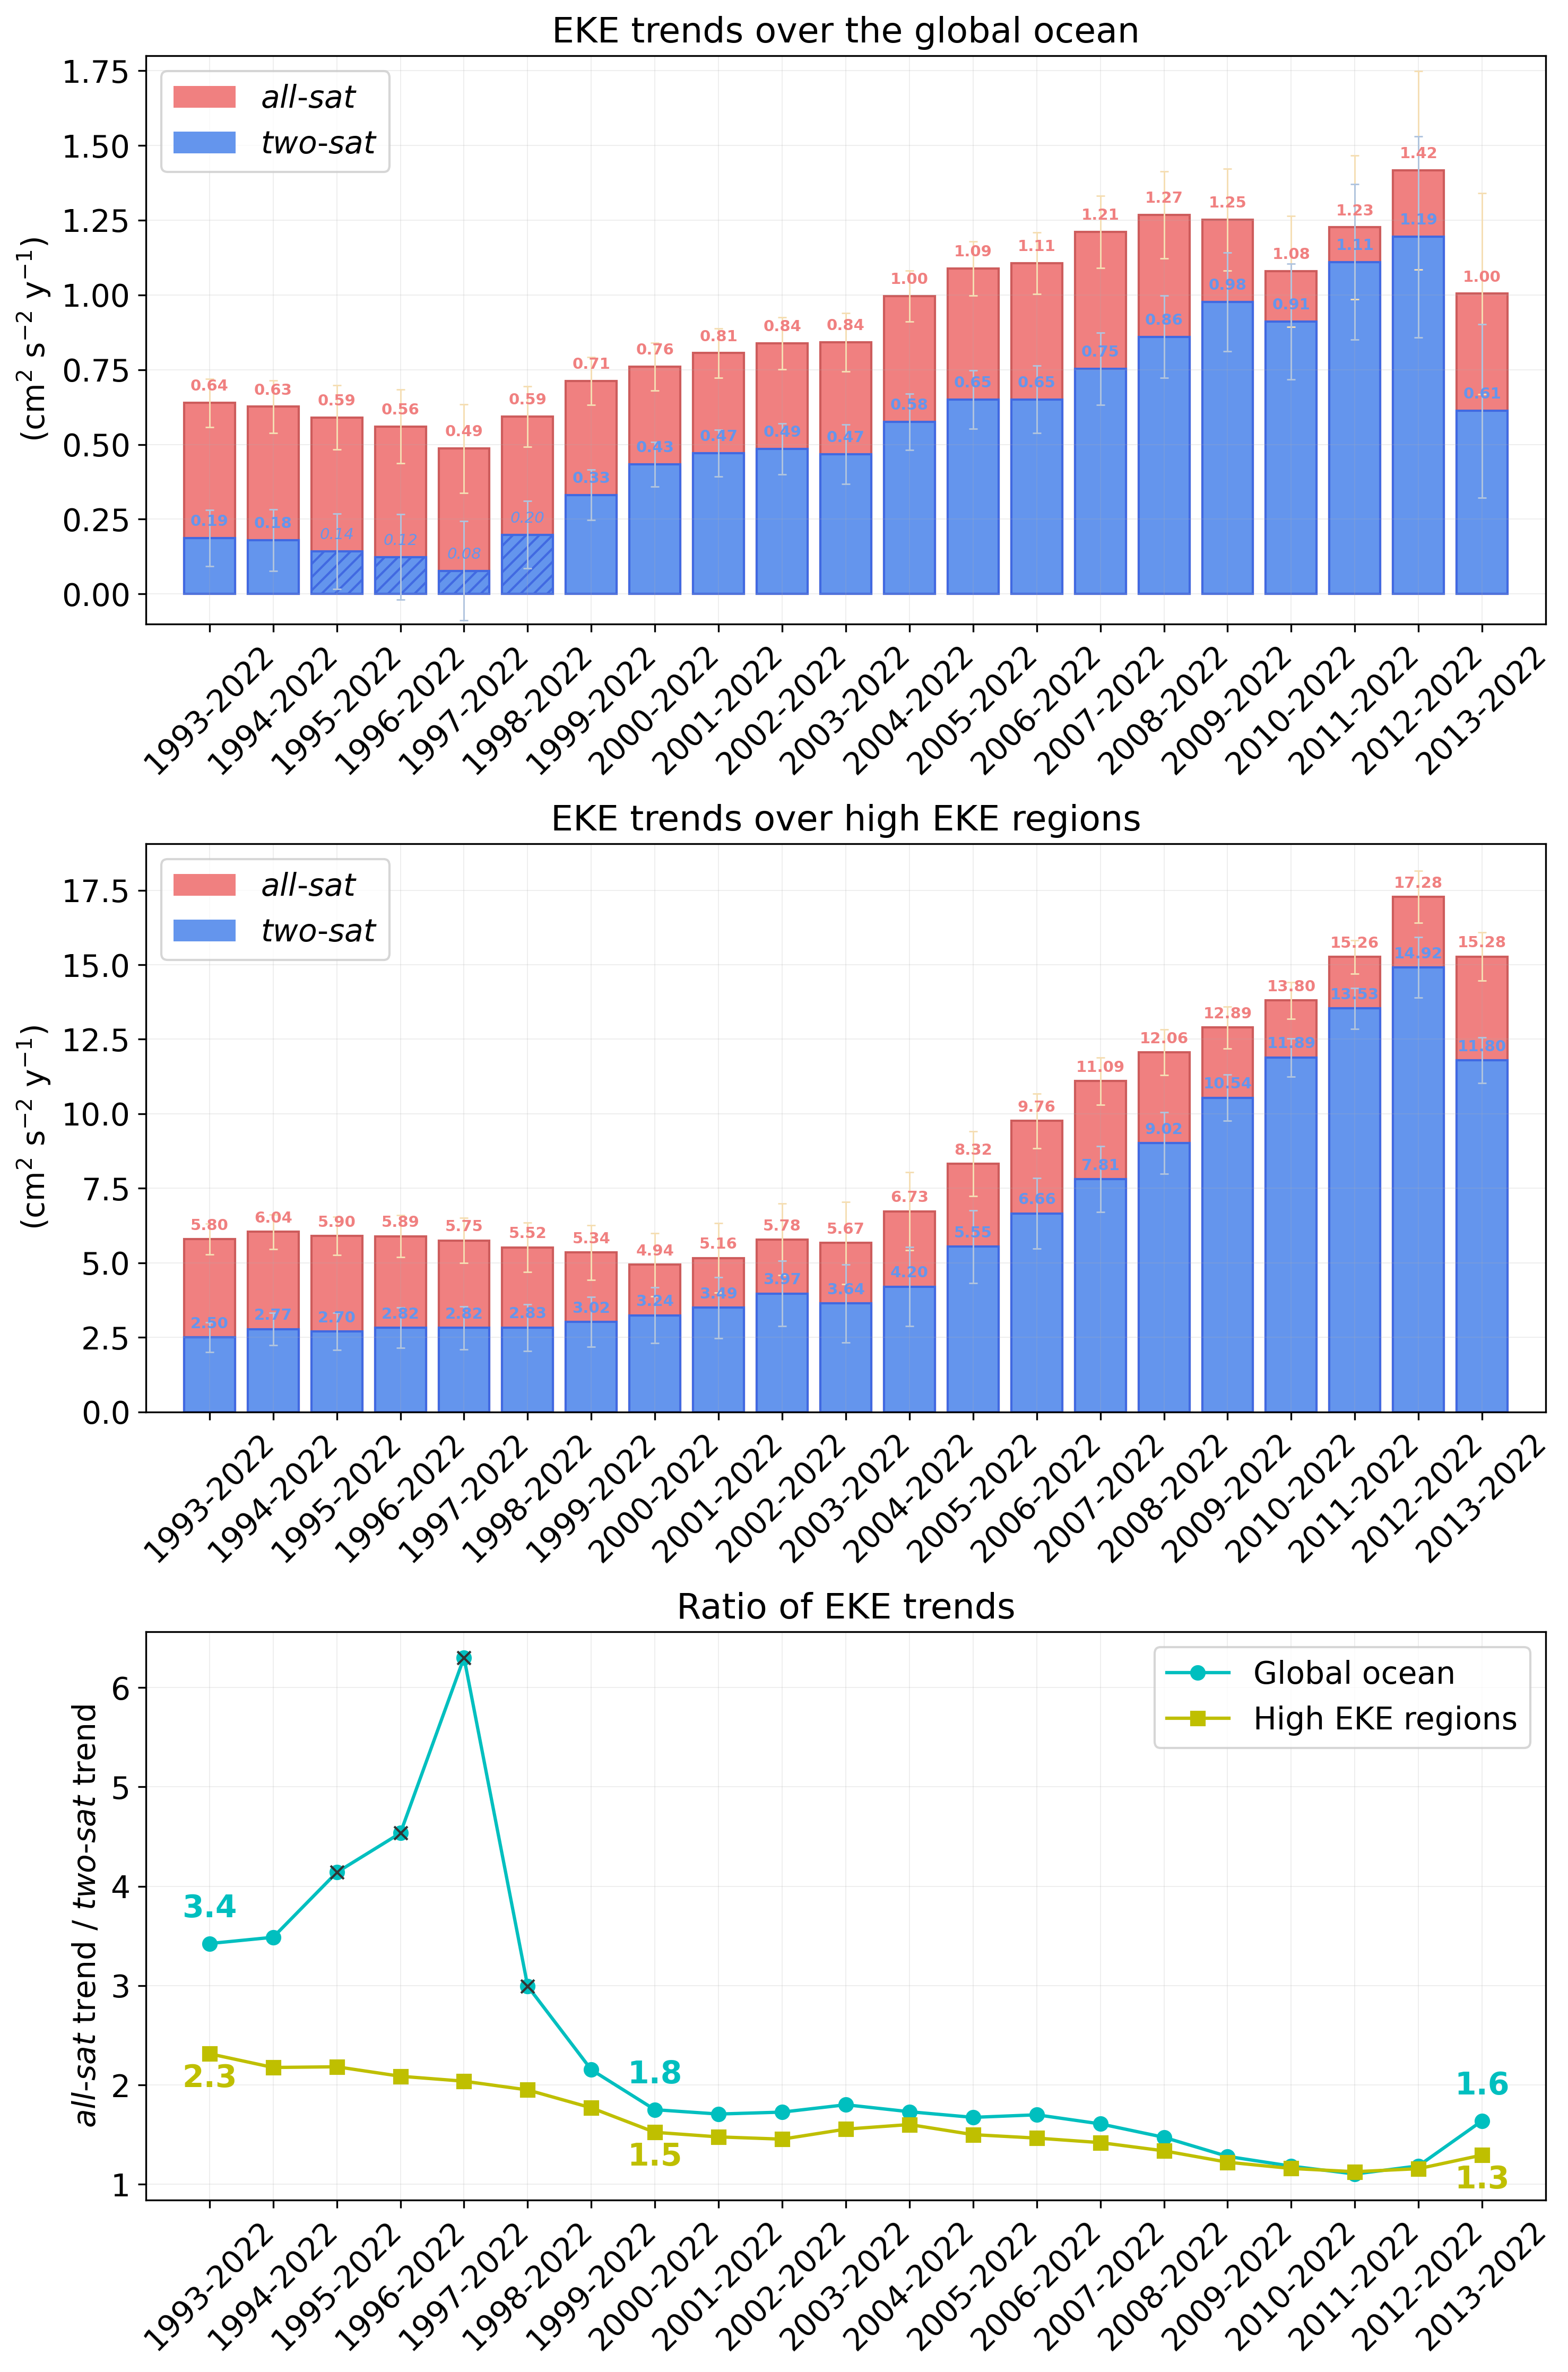

In [28]:
fig = plt.figure(figsize=(10,15), dpi=300)

gs  = mpl.gridspec.GridSpec(3, 1, figure=fig)

# Global
ax1 = fig.add_subplot(gs[0, 0])


ax1.bar(test_years, list_slope_global_all, width=wdth, align='center', 
        color='lightcoral',  edgecolor='indianred' ,
        hatch = mask_nonsig_global_all, label = r'$\it{all}$-$\it{sat}$')

ax1.bar(test_years, list_slope_global_two, width=wdth, align='center', 
        color='cornflowerblue', edgecolor='royalblue', 
        hatch = mask_nonsig_global_two, label = r'$\it{two}$-$\it{sat}$')

# Plot error bars
ax1.errorbar(test_years, list_slope_global_all, yerr=list_se_global_all, fmt='none', 
                color='wheat', capsize=2, 
                elinewidth=0.7, capthick=0.7, zorder=2)

ax1.errorbar(test_years, list_slope_global_two, yerr=list_se_global_two, fmt='none', 
                color='lightsteelblue', capsize=2, 
                elinewidth=0.7, capthick=0.7, zorder=2)


# add also trend with text - all-sat
add_text_bars(ax1, test_years, list_slope_global_all, text_style_global_all, 'lightcoral', 0.03)

#add also trend with text - two-sat
add_text_bars(ax1, test_years, list_slope_global_two, text_style_global_two, 'cornflowerblue', 0.03)

ax1.grid(which='major', linewidth=0.1)
ax1.set_title('EKE trends over the global ocean', fontsize = text_size+2)
ax1.set_xticks(test_years[::1])
ax1.set_xticklabels(['{}-2022'.format(year) for year in test_years[::1]]) 
ax1.tick_params(axis='x', labelrotation=45)
ax1.tick_params(axis='both', labelsize = text_size)
ax1.set_ylabel("(cm$^2$ s$^{-2}$ y$^{-1}$)", fontsize = text_size)
#ax1.set_ylim(0,1.55)
ax1.set_ylim(-0.1, 1.8) 
ax1.set_xlim(1992,2014)

# High EKE regions
ax2 = fig.add_subplot(gs[1, 0])

ax2.bar(test_years, list_slope_highEKE_all, width=wdth, align='center', 
        color='lightcoral',  edgecolor='indianred' ,
        hatch = mask_nonsig_highEKE_all, label = r'$\it{all}$-$\it{sat}$')
ax2.bar(test_years, list_slope_highEKE_two, width=wdth, align='center', 
        color='cornflowerblue', edgecolor='royalblue', 
        hatch = mask_nonsig_highEKE_two, label = r'$\it{two}$-$\it{sat}$')

# Plot error bars
ax2.errorbar(test_years, list_slope_highEKE_all, yerr=list_se_highEKE_all, fmt='none', 
                color='wheat', capsize=2, 
                elinewidth=0.7, capthick=0.7, zorder=2)

ax2.errorbar(test_years, list_slope_highEKE_two, yerr=list_se_highEKE_two, fmt='none', 
                color='lightsteelblue', capsize=2, 
                elinewidth=0.7, capthick=0.7, zorder=2)
 
# add also trend with text - all-sat
add_text_bars(ax2, test_years, list_slope_highEKE_all, text_style_highEKE_all, 'lightcoral', 0.2)

#add also trend with text - two-sat
add_text_bars(ax2, test_years, list_slope_highEKE_two, text_style_highEKE_two, 'cornflowerblue', 0.2)
    
ax2.grid(which='major', linewidth=0.1)    
ax2.set_title('EKE trends over high EKE regions', fontsize = text_size+2)
ax2.set_xticks(test_years[::1])
ax2.set_xticklabels(['{}-2022'.format(year) for year in test_years[::1]]) 
ax2.tick_params(axis='x', labelrotation=45)
ax2.tick_params(axis='both', labelsize = text_size)
ax2.set_ylabel("(cm$^2$ s$^{-2}$ y$^{-1}$)", fontsize = text_size)
ax2.set_xlim(1992,2014)


# Create legends for bar plots
colors = ['lightcoral', 'cornflowerblue']
categories = [r'$\it{all}$-$\it{sat}$', r'$\it{two}$-$\it{sat}$']

legend_patches = [Patch(facecolor=color, label=category) for
                      color, category in zip(colors, categories)]
ax1.legend(handles=legend_patches, loc='best',
                    fontsize=text_size)    
ax2.legend(handles=legend_patches, loc='best',
                    fontsize=text_size)  

ax3 = fig.add_subplot(gs[2, 0])

# ratio
ax3.plot(test_years, ratio_global, 'o-', color='c', label = 'Global ocean')
ax3.plot(test_years, ratio_highEKE, 's-', color='y', label = 'High EKE regions')

# mark the ratios computed from non-significant two-sat trends (all-sat are all significant)
for iy in np.arange(test_years.shape[0]):
    ax3.plot(test_years[iy], ratio_global[iy], marker=marker_nonsig_global_two[iy], color='0.2')
    ax3.plot(test_years[iy], ratio_highEKE[iy], marker=marker_nonsig_highEKE_two[iy], color='0.2')

ax3.grid(which='major', linewidth=0.1)    
ax3.legend(fontsize=text_size)    
ax3.set_title(r'Ratio of EKE trends', fontsize = text_size+2)
ax3.set_xticks(test_years[::1])
ax3.set_xticklabels(['{}-2022'.format(year) for year in test_years[::1]])
ax3.tick_params(axis='x', labelrotation=45)
ax3.tick_params(axis='both', labelsize = text_size)
ax3.set_ylabel ('$\it{all}$-$\it{sat}$ trend / $\it{two}$-$\it{sat}$ trend', fontsize = text_size)
ax3.set_xlim(1992,2014)

# add text for some periods:
inds = [0,7,20]

# for global
for i in inds:
        ax3.text(test_years[i], 
                ratio_global[i] + 0.2,
                f'{ratio_global[i]:.1f}', 
                fontsize=text_size,  
                ha='center', va='bottom', color='c',
                style=text_style_global_two[i],
                weight='bold' if text_style_global_two[i] == 'normal' else 'normal')
        
# for high EKE regions
for i in inds:
        ax3.text(test_years[i], 
                ratio_highEKE[i] - 0.4,
                f'{ratio_highEKE[i]:.1f}', 
                fontsize=text_size,  
                ha='center', va='bottom', color='y',
                style=text_style_highEKE_two[i],
                weight='bold' if text_style_highEKE_two[i] == 'normal' else 'normal')

 

plt.tight_layout()

extension = 'png'
savepath = f'../../figures/Fig_3_sensitivity_test_revised.{extension}' #2020.{extension}'

dir_path = os.path.dirname(os.path.realpath(savepath))+'/'
if not os.path.exists(dir_path):
        os.makedirs(dir_path)

plt.savefig(savepath, dpi=300, bbox_inches='tight')